<a href="https://colab.research.google.com/github/Diggi14/project_Property/blob/main/7_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://github.com/Diggi14/project_Property.git

fatal: destination path 'project_Property' already exists and is not an empty directory.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('/content/project_Property/final.csv')

In [16]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [17]:
df.head(5)

,society,price,bedRoom,bathroom,balcony,floorNum,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
0,maa bhagwati residency,0.45,2,2,1,4.0,flat,sector 7,1287.000,900.0,1,0,0,0,0,relatively new,15,1,27,450.00
1,Apna Enclave,0.50,2,2,1,1.0,flat,sector 3,929.500,650.0,1,0,0,0,0,old property,21,2,34,325.00
2,Tulsiani Easy in Homes,0.40,2,2,3,12.0,flat,sohna,850.850,595.0,1,0,0,0,0,New Property,41,1,25,297.50
3,Smart World Orchard,1.47,2,2,2,2.0,flat,sector 61,1716.000,1200.0,0,1,0,0,0,relatively new,69,1,51,600.00
4,Parkwood Westend,0.70,2,2,3,5.0,flat,sector 92,1346.345,941.5,0,1,0,0,0,Under Construction,0,1,5,470.75


<Axes: xlabel='luxury_score'>

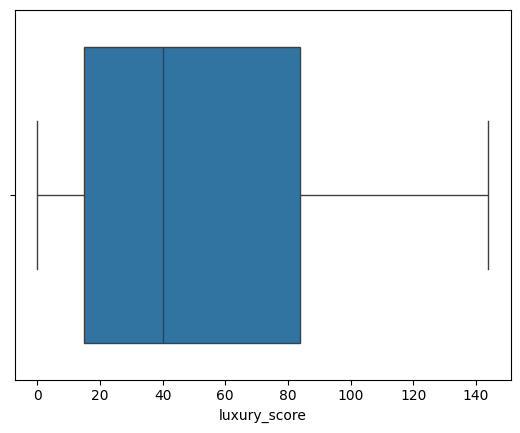

In [18]:
sns.boxplot(x=df['luxury_score'])


In [19]:
df['luxury_score'].describe()

,luxury_score
count,2267.000000
mean,50.550507
std,42.368029
min,0.000000
25%,15.000000
50%,40.000000
75%,84.000000
max,144.000000


In [20]:
def categotize(val):
  if(val<=50):
    return 'low'
  elif(val<=100):
    return 'medium'
  else:
    return 'high'

In [21]:
df['luxury_score']=df['luxury_score'].apply(categotize)

<Axes: xlabel='floorNum'>

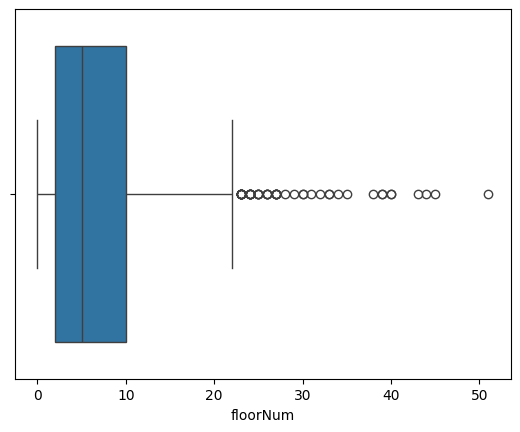

In [22]:
sns.boxplot(x=df['floorNum'])

In [23]:
df['floorNum'].describe()

,floorNum
count,2267.000000
mean,6.791795
std,6.082535
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


In [24]:
def categotize_floor(val):
  if(val<=2):
    return 'low'
  elif(val<=15):
    return 'mid'
  else:
    return 'high'

In [25]:
df['floorNum']=df['floorNum'].apply(categotize_floor)

In [26]:
from sklearn.preprocessing import OrdinalEncoder
of=OrdinalEncoder()
df_encode=df.copy()
cat_col=df_encode.select_dtypes(include=['object']).columns
for col in cat_col:
  df_encode[col]=of.fit_transform(df_encode[[col]])
print(of.categories_)

[array(['high', 'low', 'medium'], dtype=object)]


In [58]:
df['balcony'].value_counts()

,count
balcony,
3,665
3+,644
2,604
1,255
0,99


In [28]:
df_encode.head(3)

,society,price,bedRoom,bathroom,balcony,floorNum,type,sector,Super_build_area,Carpet_area,Not available,Study Room,Servant Room,Pooja Room,Others,age,luxury_score,furnishing_type,location_score,area_ratio
0,519.0,0.45,2,2,1.0,2.0,0.0,77.0,1287.00,900.0,1,0,0,0,0,3.0,1.0,1,27,450.0
1,50.0,0.50,2,2,1.0,1.0,0.0,33.0,929.50,650.0,1,0,0,0,0,2.0,1.0,2,34,325.0
2,464.0,0.40,2,2,3.0,2.0,0.0,109.0,850.85,595.0,1,0,0,0,0,0.0,1.0,1,25,297.5


In [29]:
x_label=df_encode.drop(['price'],axis=1)
y_label=df_encode['price']

In [59]:
x_label['balcony'].value_counts()

,count
balcony,
3.0,665
4.0,644
2.0,604
1.0,255
0.0,99


<Axes: >

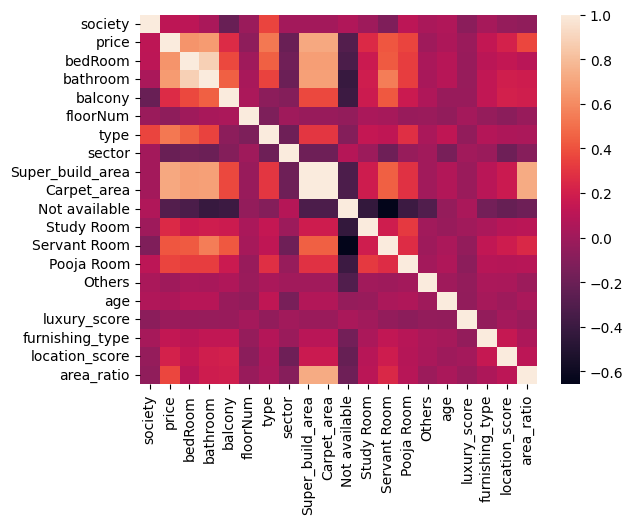

In [30]:
sns.heatmap(df_encode.corr())

In [31]:
corr1=df_encode.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'correlation'})

In [32]:
corr1

,feature,correlation
0,price,1.000000
1,bedRoom,0.637010
2,bathroom,0.657927
3,balcony,0.257348
4,floorNum,-0.062614
5,type,0.528401
6,sector,-0.206425
7,Super_build_area,0.711355
8,Carpet_area,0.711355
9,Not available,-0.296148


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=300,
    random_state=42,
    n_jobs=-1)
rf.fit(x_label,y_label)
feature_importance = pd.DataFrame({
    'feature': x_label.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance

,feature,importance
8,Carpet_area,0.269739
7,Super_build_area,0.258582
5,type,0.112981
6,sector,0.090531
1,bedRoom,0.072586
17,location_score,0.043906
18,area_ratio,0.040740
2,bathroom,0.027084
0,society,0.023249
14,age,0.010212


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(x_label, y_label)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

In [35]:
gb_importance = pd.DataFrame({
    'feature': x_label.columns,
    'importance': gbr.feature_importances_
}).sort_values(by='importance', ascending=False)

gb_importance


,feature,importance
8,Carpet_area,0.255908
7,Super_build_area,0.238503
1,bedRoom,0.132635
5,type,0.104698
6,sector,0.097803
2,bathroom,0.049536
17,location_score,0.036503
18,area_ratio,0.035608
11,Servant Room,0.015185
0,society,0.013526


# **we are use tree based model because we have used oridinal encoding if we have to used linear model then we would use one hot encoding**

In [36]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_label,y_label,test_size=0.2,random_state=42)
rf=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
rf.fit(x_train,y_train)
perm = permutation_importance(rf, x_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance_mean': perm.importances_mean,
}).sort_values(by='importance_mean', ascending=False)

perm_df


,feature,importance_mean
5,type,0.226714
8,Carpet_area,0.109354
6,sector,0.091728
7,Super_build_area,0.090082
17,location_score,0.020337
2,bathroom,0.013231
18,area_ratio,0.010351
1,bedRoom,0.009859
0,society,0.006204
3,balcony,0.001357


In [37]:
from sklearn.feature_selection import RFE

rf = RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)

rfe = RFE(estimator=rf,n_features_to_select=x_label.shape[1],step=1)
select_label=rfe.fit(x_label,y_label)
selected_features = x_label.columns[rfe.support_]
selected_coff=select_label.estimator_.feature_importances_

rfe_ranking = pd.DataFrame({
    'feature': x_label.columns,
    'selected_coff': selected_coff
}).sort_values(by='selected_coff',ascending=False)

rfe_ranking

,feature,selected_coff
8,Carpet_area,0.269739
7,Super_build_area,0.258582
5,type,0.112981
6,sector,0.090531
1,bedRoom,0.072586
17,location_score,0.043906
18,area_ratio,0.040740
2,bathroom,0.027084
0,society,0.023249
14,age,0.010212


In [38]:
import shap
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_label,y_label)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)
shap_importance = pd.DataFrame({
    'feature': x_label.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

shap_importance

,feature,mean_abs_shap
7,Super_build_area,0.576659
8,Carpet_area,0.533140
5,type,0.482894
6,sector,0.301369
1,bedRoom,0.212262
2,bathroom,0.182294
17,location_score,0.160117
18,area_ratio,0.104340
0,society,0.061286
11,Servant Room,0.044279


In [40]:
all_rel=corr1.merge(feature_importance,on='feature').merge(gb_importance,on='feature').merge(perm_df,on='feature').merge(rfe_ranking,on='feature').merge(shap_importance,on='feature').set_index('feature')

In [41]:
all_rel

,correlation,importance_x,importance_y,importance_mean,selected_coff,mean_abs_shap
feature,,,,,,
bedRoom,0.637010,0.072586,0.132635,0.009859,0.072586,0.212262
bathroom,0.657927,0.027084,0.049536,0.013231,0.027084,0.182294
balcony,0.257348,0.007078,0.001982,0.001357,0.007078,0.021010
floorNum,-0.062614,0.005806,0.002090,-0.003216,0.005806,0.027270
type,0.528401,0.112981,0.104698,0.226714,0.112981,0.482894
sector,-0.206425,0.090531,0.097803,0.091728,0.090531,0.301369
Super_build_area,0.711355,0.258582,0.238503,0.090082,0.258582,0.576659
Carpet_area,0.711355,0.269739,0.255908,0.109354,0.269739,0.533140
Not available,-0.296148,0.003095,0.000548,-0.004388,0.003095,0.011898


In [42]:
all_rel.index

Index(['bedRoom', 'bathroom', 'balcony', 'floorNum', 'type', 'sector',
       'Super_build_area', 'Carpet_area', 'Not available', 'Study Room',
       'Servant Room', 'Pooja Room', 'Others', 'age', 'luxury_score',
       'furnishing_type', 'location_score', 'area_ratio'],
      dtype='object', name='feature')

In [43]:
from sklearn.preprocessing import MinMaxScaler

cols = ['correlation', 'importance_x',	'importance_y', 'importance_mean', 'selected_coff', 'mean_abs_shap']

scaler = MinMaxScaler()

all_rel_norm = all_rel.copy()
all_rel_norm[cols] = scaler.fit_transform(all_rel[cols])

all_rel_norm


,correlation,importance_x,importance_y,importance_mean,selected_coff,mean_abs_shap
feature,,,,,,
bedRoom,0.926208,0.260612,0.517635,0.061650,0.260612,0.361913
bathroom,0.946970,0.089966,0.192474,0.076241,0.089966,0.309438
balcony,0.549375,0.014937,0.006397,0.024857,0.014937,0.027015
floorNum,0.231795,0.010168,0.006819,0.005070,0.010168,0.037977
type,0.818408,0.412106,0.408321,1.000000,0.412106,0.835811
sector,0.089055,0.327912,0.381341,0.415903,0.327912,0.517946
Super_build_area,1.000000,0.958158,0.931893,0.408780,0.958158,1.000000
Carpet_area,1.000000,1.000000,1.000000,0.492171,1.000000,0.923796
Not available,0.000000,0.000000,0.000785,0.000000,0.000000,0.011060


In [44]:
all_rel_norm.mean(axis=1).sort_values(ascending=False)

,0
feature,
Carpet_area,0.902661
Super_build_area,0.876165
type,0.647792
bedRoom,0.398105
sector,0.343345
bathroom,0.284176
location_score,0.221903
area_ratio,0.218218
Servant Room,0.145980


In [45]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
scores=cross_val_score(rf,x_label,y_label,scoring='r2',cv=10)

In [46]:
scores.mean()

np.float64(0.7060689514470636)

In [47]:
rf=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
scores=cross_val_score(rf,x_label.drop(['Not available','Others','floorNum'],axis=1),y_label,scoring='r2',cv=10)
scores.mean()

np.float64(0.7099068470100948)

In [48]:
rf=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
scores=cross_val_score(rf,x_label.drop(['Not available','Others','floorNum','luxury_score'],axis=1),y_label,scoring='r2',cv=10)
scores.mean()

np.float64(0.7107778402334233)

In [49]:
#we can drop ['Not available','Others','floorNum','luxury_score']

In [50]:
rf=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
scores=cross_val_score(rf,x_label.drop(['Not available','Others','floorNum','luxury_score','furnishing_type','age'],axis=1),y_label,scoring='r2',cv=10)
scores.mean()

np.float64(0.7234261135668023)

In [60]:
export_df=df.drop(['Not available','Others','floorNum','price'],axis=1)

In [61]:
export_df['price']=y_label

In [63]:
export_df.to_csv("model_trainer.csv")

In [64]:
export_df.head(3)

,society,bedRoom,bathroom,balcony,type,sector,Super_build_area,Carpet_area,Study Room,Servant Room,Pooja Room,age,luxury_score,furnishing_type,location_score,area_ratio,price
0,maa bhagwati residency,2,2,1,flat,sector 7,1287.00,900.0,0,0,0,relatively new,low,1,27,450.0,0.45
1,Apna Enclave,2,2,1,flat,sector 3,929.50,650.0,0,0,0,old property,low,2,34,325.0,0.50
2,Tulsiani Easy in Homes,2,2,3,flat,sohna,850.85,595.0,0,0,0,New Property,low,1,25,297.5,0.40


In [65]:
export_df['balcony'].value_counts()

,count
balcony,
3,665
3+,644
2,604
1,255
0,99
